In [2]:
%matplotlib inline


Seed-based connectivity on the surface
=======================================

The dataset that is a subset of the enhanced NKI Rockland sample
(http://fcon_1000.projects.nitrc.org/indi/enhanced/, Nooner et al, 2012)

Resting state fMRI scans (TR=645ms) of 102 subjects were preprocessed
(https://github.com/fliem/nki_nilearn) and projected onto the Freesurfer
fsaverage5 template (Dale et al, 1999, Fischl et al, 1999). For this example
we use the time series of a single subject's left hemisphere.

The Destrieux parcellation (Destrieux et al, 2010) in fsaverage5 space as
distributed with Freesurfer is used to select a seed region in the posterior
cingulate cortex.

Functional connectivity of the seed region to all other cortical nodes in the
same hemisphere is calculated using Pearson product-moment correlation
coefficient.

The :func:`nilearn.plotting.plot_surf_stat_map` function is used
to plot the resulting statistical map on the (inflated) pial surface.

See also `for a similar example but using volumetric input data
<sphx_glr_auto_examples_03_connectivity_plot_seed_to_voxel_correlation.py>`.

See `plotting` for more details on plotting tools.

NOTE: This example needs matplotlib version higher than 1.3.1.

References
----------

Nooner et al, (2012). The NKI-Rockland Sample: A model for accelerating the
pace of discovery science in psychiatry. Frontiers in neuroscience 6, 152.
URL http://dx.doi.org/10.3389/fnins.2012.00152

Dale et al, (1999). Cortical surface-based analysis.I. Segmentation and
surface reconstruction. Neuroimage 9.
URL http://dx.doi.org/10.1006/nimg.1998.0395

Fischl et al, (1999). Cortical surface-based analysis. II: Inflation,
flattening, and a surface-based coordinate system. Neuroimage 9.
http://dx.doi.org/10.1006/nimg.1998.0396

Destrieux et al, (2010). Automatic parcellation of human cortical gyri and
sulci using standard anatomical nomenclature. NeuroImage, 53, 1.
URL http://dx.doi.org/10.1016/j.neuroimage.2010.06.010.



Retrieving the data
-------------------



In [9]:
# NKI resting state data from nilearn
from nilearn import datasets

nki_dataset = datasets.fetch_surf_nki_enhanced(n_subjects=1)

# The nki dictionary contains file names for the data
# of all downloaded subjects.
print(('Resting state data of the first subjects on the '
       'fsaverag5 surface left hemisphere is at: %s' %
      nki_dataset['func_left'][0]))

# Destrieux parcellation for left hemisphere in fsaverage5 space
destrieux_atlas = datasets.fetch_atlas_surf_destrieux()
parcellation = destrieux_atlas['map_left']
labels = destrieux_atlas['labels']

# Fsaverage5 surface template
fsaverage = datasets.fetch_surf_fsaverage5()

# The fsaverage dataset contains file names pointing to
# the file locations
print('Fsaverage5 pial surface of left hemisphere is at: %s' %
      fsaverage['pial_left'])
print('Fsaverage5 inflated surface of left hemisphere is at: %s' %
      fsaverage['infl_left'])
print('Fsaverage5 sulcal depth map of left hemisphere is at: %s' %
      fsaverage['sulc_left'])

Resting state data of the first subjects on the fsaverag5 surface left hemisphere is at: /homes_unix/hirsch/nilearn_data/nki_enhanced_surface/A00028185/A00028185_left_preprocessed_fwhm6.gii
Fsaverage5 pial surface of left hemisphere is at: /homes_unix/hirsch/nilearn_data/fsaverage5/pial.left.gii
Fsaverage5 inflated surface of left hemisphere is at: /homes_unix/hirsch/nilearn_data/fsaverage5/pial_inflated.left.gii
Fsaverage5 sulcal depth map of left hemisphere is at: /homes_unix/hirsch/nilearn_data/fsaverage5/sulc.left.gii


Downloaded 51997 of 51997 bytes (100.0%,    0.0s remaining) ...done. (2 seconds, 0 min)


Extracting the seed time series
--------------------------------



In [10]:
# Load resting state time series from nilearn
from nilearn import plotting

timeseries = plotting.surf_plotting.load_surf_data(nki_dataset['func_left'][0])

# Extract seed region via label
pcc_region = b'G_cingul-Post-dorsal'

import numpy as np
pcc_labels = np.where(parcellation == labels.index(pcc_region))[0]

# Extract time series from seed region
seed_timeseries = np.mean(timeseries[pcc_labels], axis=0)

Calculating seed-based functional connectivity
----------------------------------------------



In [11]:
# Calculate Pearson product-moment correlation coefficient between seed
# time series and timeseries of all cortical nodes of the hemisphere
from scipy import stats

stat_map = np.zeros(timeseries.shape[0])
for i in range(timeseries.shape[0]):
    stat_map[i] = stats.pearsonr(seed_timeseries, timeseries[i])[0]

# Re-mask previously masked nodes (medial wall)
stat_map[np.where(np.mean(timeseries, axis=1) == 0)] = 0

Display ROI on surface



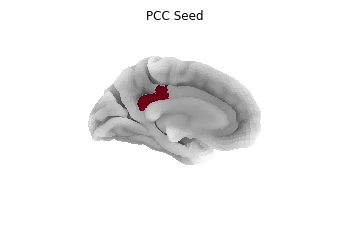

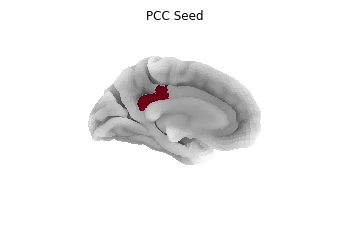

In [12]:
plotting.plot_surf_roi(fsaverage['pial_left'], roi_map=pcc_labels,
                       hemi='left', view='medial',
                       bg_map=fsaverage['sulc_left'], bg_on_data=True,
                       title='PCC Seed')

Display unthresholded stat map  with dimmed background



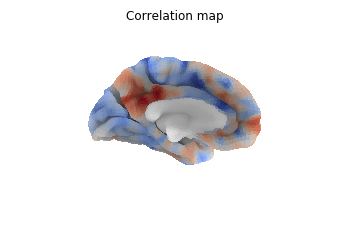

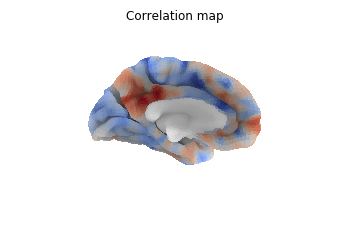

In [14]:
plotting.plot_surf_stat_map(fsaverage['pial_left'], stat_map=stat_map,
                            hemi='left', view='medial',
                            bg_map=fsaverage['sulc_left'], bg_on_data=True,
                            darkness=.5, title='Correlation map')

Display unthresholded stat map without background map, transparency is
automatically set to .5, but can also be controlled with the alpha parameter



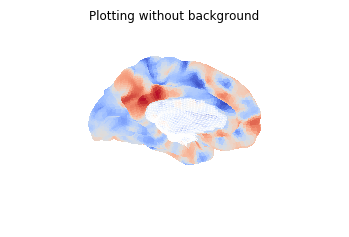

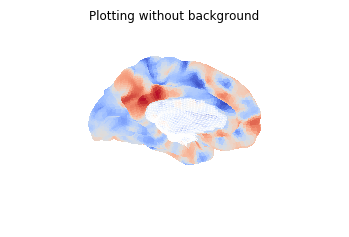

In [15]:
plotting.plot_surf_stat_map(fsaverage['pial_left'], stat_map=stat_map,
                            hemi='left', view='medial',
                            title='Plotting without background')

Many different options are available for plotting, for example thresholding,
or using custom colormaps



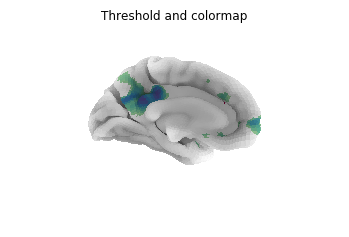

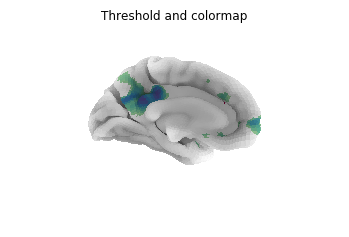

In [17]:
plotting.plot_surf_stat_map(fsaverage['pial_left'], stat_map=stat_map,
                            hemi='left', view='medial',
                            bg_map=fsaverage['sulc_left'], bg_on_data=True,
                            cmap='Spectral', threshold=.5,
                            title='Threshold and colormap')

The plots can be saved to file, in which case the display is closed after
creating the figure



In [19]:
plotting.plot_surf_stat_map(fsaverage['infl_left'], stat_map=stat_map,
                            hemi='left', bg_map=fsaverage['sulc_left'],
                            bg_on_data=True, threshold=.6,
                            output_file='plot_surf_stat_map.png')

plotting.show()